<a href="https://colab.research.google.com/github/IshratJahan1623/Intro-to-Machine-Learning/blob/main/Homework_5/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1(a)

In [ ]:
import torch
import torch.optim as optim

# Temperature Data
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0], dtype=torch.float32)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4], dtype=torch.float32)

# Feature scaling for numerical stability
t_un = 0.1 * t_u

# Non-linear equation
def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss function
def loss_fn(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

# Initialize Parameters
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)  # [w2, w1, b]

# Define optimizer
optimizer = optim.SGD([params], lr=1e-4)

# Training loop
epochs = 2000
for epoch in range(epochs):
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print final parameter values
print("\nFinal Learned Parameters:")
print(f"w2 = {params[0].item():.6f}")
print(f"w1 = {params[1].item():.6f}")
print(f"b  = {params[2].item():.6f}")



Final Learned Parameters:
w2 = 0.439480
w1 = -0.196743
b  = -0.509919


problem 1 (b)


Training with Learning Rate = 0.1
Epoch  500 | Loss = nan
Epoch 1000 | Loss = nan
Epoch 1500 | Loss = nan
Epoch 2000 | Loss = nan
Epoch 2500 | Loss = nan
Epoch 3000 | Loss = nan
Epoch 3500 | Loss = nan
Epoch 4000 | Loss = nan
Epoch 4500 | Loss = nan
Epoch 5000 | Loss = nan
Final Parameters: w2=nan, w1=nan, b=nan

Training with Learning Rate = 0.01
Epoch  500 | Loss = nan
Epoch 1000 | Loss = nan
Epoch 1500 | Loss = nan
Epoch 2000 | Loss = nan
Epoch 2500 | Loss = nan
Epoch 3000 | Loss = nan
Epoch 3500 | Loss = nan
Epoch 4000 | Loss = nan
Epoch 4500 | Loss = nan
Epoch 5000 | Loss = nan
Final Parameters: w2=nan, w1=nan, b=nan

Training with Learning Rate = 0.001
Epoch  500 | Loss = nan
Epoch 1000 | Loss = nan
Epoch 1500 | Loss = nan
Epoch 2000 | Loss = nan
Epoch 2500 | Loss = nan
Epoch 3000 | Loss = nan
Epoch 3500 | Loss = nan
Epoch 4000 | Loss = nan
Epoch 4500 | Loss = nan
Epoch 5000 | Loss = nan
Final Parameters: w2=nan, w1=nan, b=nan

Training with Learning Rate = 0.0001
Epoch  500 | L

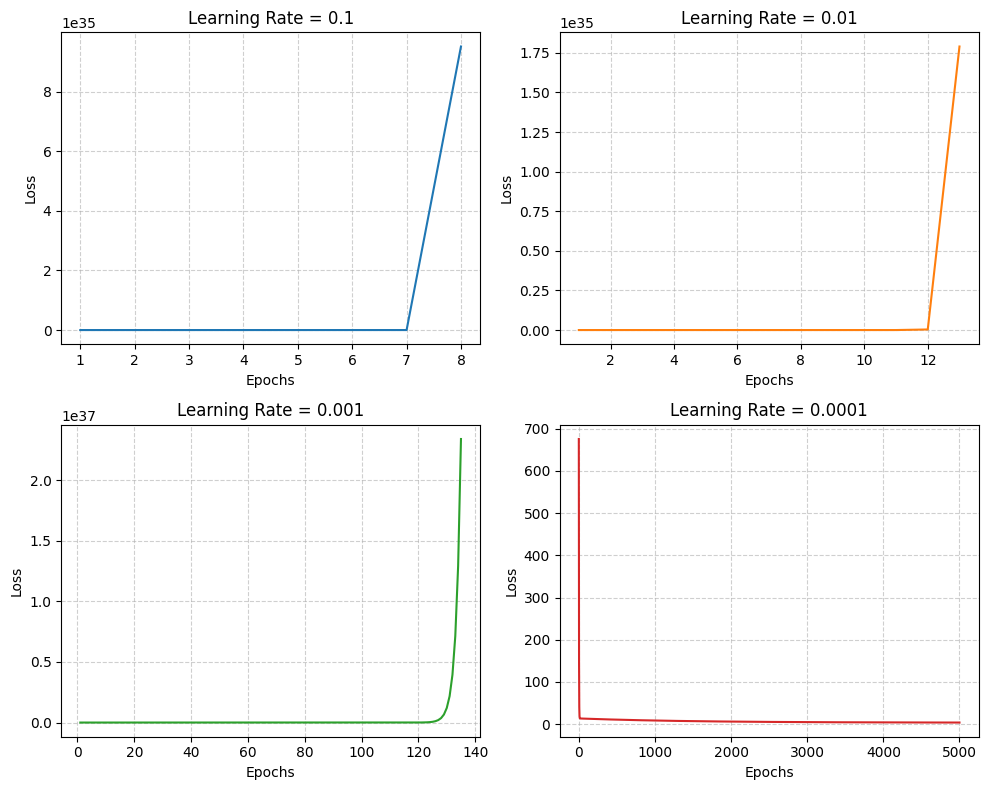

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt


# Temperature Data

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0], dtype=torch.float32)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4], dtype=torch.float32)
t_un = 0.1 * t_u  # Feature scaling


# Model Definition

def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss Function

def loss_fn(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

# Training Function

def train_model(lr, epochs=5000):
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)  # [w2, w1, b]
    optimizer = optim.SGD([params], lr=lr)
    loss_list = []

    print(f"\nTraining with Learning Rate = {lr}")

    for epoch in range(1, epochs + 1):
        t_p = model(t_un, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())

        if epoch % 500 == 0:
            print(f"Epoch {epoch:4d} | Loss = {loss.item():.6f}")

    print(f"Final Parameters: w2={params[0].item():.6f}, w1={params[1].item():.6f}, b={params[2].item():.6f}")
    return loss_list


# Run Training for Four Learning Rates

learning_rates = [0.1, 0.01, 0.001, 0.0001]
all_losses = {}

for lr in learning_rates:
    all_losses[lr] = train_model(lr)


# Plot in Four Subplots

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, lr in enumerate(learning_rates):
    axes[i].plot(range(1, len(all_losses[lr]) + 1), all_losses[lr], color='C'+str(i))
    axes[i].set_title(f'Learning Rate = {lr}')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Loss')
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Problem 1(c)


Training Linear Model
Epoch  500 | Linear Loss = 7.860115
Epoch 1000 | Linear Loss = 3.828538
Epoch 1500 | Linear Loss = 3.092191
Epoch 2000 | Linear Loss = 2.957698
Epoch 2500 | Linear Loss = 2.933134
Epoch 3000 | Linear Loss = 2.928648
Epoch 3500 | Linear Loss = 2.927830
Epoch 4000 | Linear Loss = 2.927679
Epoch 4500 | Linear Loss = 2.927652
Epoch 5000 | Linear Loss = 2.927647

Training Nonlinear Model with LR = 0.1
Loss exploded, stopping early.

Training Nonlinear Model with LR = 0.01
Loss exploded, stopping early.

Training Nonlinear Model with LR = 0.001
Loss exploded, stopping early.

Training Nonlinear Model with LR = 0.0001
Epoch   500 | Loss = 10.708596
Epoch  1000 | Loss = 8.642083
Epoch  1500 | Loss = 7.171005
Epoch  2000 | Loss = 6.123477
Epoch  2500 | Loss = 5.377227
Epoch  3000 | Loss = 4.845285
Epoch  3500 | Loss = 4.465788
Epoch  4000 | Loss = 4.194724
Epoch  4500 | Loss = 4.000802
Epoch  5000 | Loss = 3.861744

Final Comparison
Linear Model:     Loss = 2.9276 | w = 5

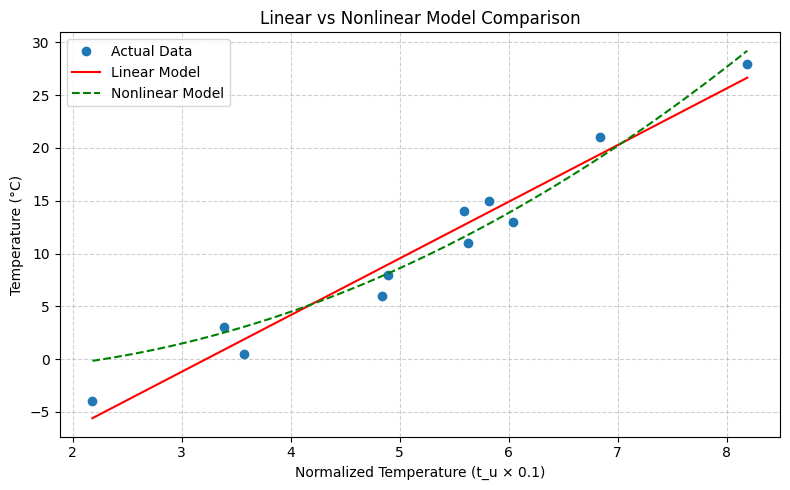

In [2]:
import torch
import matplotlib.pyplot as plt


#  Prepare Training Data

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0], dtype=torch.float32)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4], dtype=torch.float32)
t_un = 0.1 * t_u  # Feature scaling


# Define Models and Loss Function

def linear_model(t_u, w, b):
    return w * t_u + b

def nonlinear_model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

def loss_fn(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)


# Train Linear Model (Baseline)

w_lin = torch.ones(1, requires_grad=True)
b_lin = torch.zeros(1, requires_grad=True)
lr_lin = 0.01
epochs_lin = 5000

print("\nTraining Linear Model")
for epoch in range(epochs_lin):
    y_pred = linear_model(t_un, w_lin, b_lin)
    loss = loss_fn(y_pred, t_c)
    loss.backward()

    with torch.no_grad():
        w_lin -= lr_lin * w_lin.grad
        b_lin -= lr_lin * b_lin.grad
        w_lin.grad.zero_()
        b_lin.grad.zero_()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch+1:4d} | Linear Loss = {loss.item():.6f}")

loss_linear = loss.item()


#  Train Nonlinear Model (Quadratic)

learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    w1 = torch.ones(1, requires_grad=True)
    w2 = torch.ones(1, requires_grad=True)
    b  = torch.zeros(1, requires_grad=True)

    print(f"\nTraining Nonlinear Model with LR = {lr}")
    for epoch in range(5000):
        y_pred = nonlinear_model(t_un, w1, w2, b)
        loss = loss_fn(y_pred, t_c)
        loss.backward()

        with torch.no_grad():
            w1 -= lr * w1.grad
            w2 -= lr * w2.grad
            b  -= lr * b.grad
            w1.grad.zero_()
            w2.grad.zero_()
            b.grad.zero_()

        if (epoch + 1) % 500 == 0:
            print(f"Epoch {epoch+1:5d} | Loss = {loss.item():.6f}")

        if torch.isnan(loss):
            print("Loss exploded, stopping early.")
            break

    final_loss = loss.item() if not torch.isnan(loss) else float('inf')
    results[lr] = (final_loss, w1.item(), w2.item(), b.item())


#  Pick Best Nonlinear Model

best_lr = min(results, key=lambda k: results[k][0])
best_loss, w1_best, w2_best, b_best = results[best_lr]

print("\nFinal Comparison")
print(f"Linear Model:     Loss = {loss_linear:.4f} | w = {w_lin.item():.4f}, b = {b_lin.item():.4f}")
print(f"Nonlinear Model:  Loss = {best_loss:.4f} | w1 = {w1_best:.4f}, w2 = {w2_best:.4f}, b = {b_best:.4f} | Best LR = {best_lr}")


# Visualization

t_range = torch.linspace(min(t_un), max(t_un), 100)
linear_pred = linear_model(t_range, w_lin, b_lin).detach()
nonlinear_pred = nonlinear_model(t_range, torch.tensor(w1_best), torch.tensor(w2_best), torch.tensor(b_best)).detach()

plt.figure(figsize=(8, 5))
plt.plot(t_un, t_c, 'o', label='Actual Data', markersize=6)
plt.plot(t_range, linear_pred, 'r-', label='Linear Model')
plt.plot(t_range, nonlinear_pred, 'g--', label='Nonlinear Model')
plt.xlabel('Normalized Temperature (t_u × 0.1)')
plt.ylabel('Temperature (°C)')
plt.title('Linear vs Nonlinear Model Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Problem 2 (a)


 Final Model Parameters 
area: 718864.7500
bedrooms: 170053.7344
bathrooms: 595482.1250
stories: 409925.5625
parking: 364167.0625
Bias (B): 4825551.5000

 Model Performance Metrics 
MSE (Training): 1652019560448.0000
MSE (Validation): 1081785647104.0000
RMSE (Training): 1285309.1250
RMSE (Validation): 1040089.2500
R² Score (Training): 0.5627
R² Score (Validation): 0.5259

 Dataset Information 
Original dataset size: 545
Training set size: 436
Validation set size: 109
Split ratio: 80.0% training, 20.0% validation


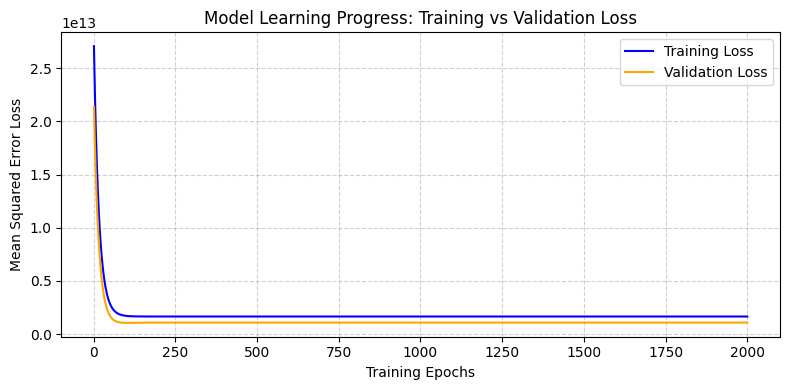

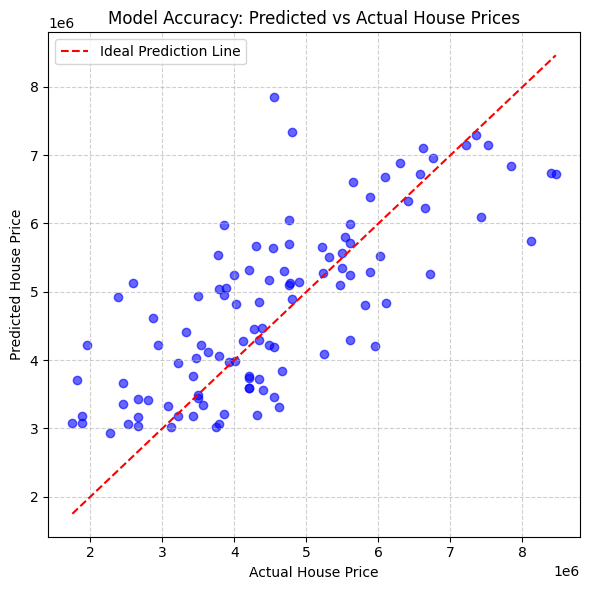

In [4]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#  Load Housing Dataset

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)


#  Prepare Features and Target

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
feature = data[features].values
target = data["price"].values.reshape(-1, 1)


#  Split Data into Training and Validation Sets

torch.manual_seed(80)
N = feature.shape[0]
train_size = int(0.8 * N)

feature_tensor = torch.tensor(feature, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.float32)

indices = torch.randperm(N)
train_idx = indices[:train_size]
val_idx = indices[train_size:]

feature_train = feature_tensor[train_idx]
feature_val = feature_tensor[val_idx]
target_train = target_tensor[train_idx]
target_val = target_tensor[val_idx]

# Normalize Feature Values
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train.numpy())
feature_val_scaled = scaler.transform(feature_val.numpy())
feature_train = torch.tensor(feature_train_scaled, dtype=torch.float32)
feature_val = torch.tensor(feature_val_scaled, dtype=torch.float32)
# target_train and target_val remain as they are (already tensors)


# Create Linear Regression Model

class LinearRegressionModel(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel(feature_train.shape[1])


#  Configure Loss Function and Optimizer

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)


#  Train the Model

epochs = 2000
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Forward pass
    target_pred = model(feature_train)
    loss = criterion(target_pred, target_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record loss
    train_losses.append(loss.item())
    with torch.no_grad():
        target_val_pred = model(feature_val)
        val_loss = criterion(target_val_pred, target_val)
        val_losses.append(val_loss.item())


#  Display Learned Parameters

weights = model.linear.weight.data.numpy().flatten()
bias = model.linear.bias.item()

print("\n Final Model Parameters ")
for f, w in zip(features, weights):
    print(f"{f}: {w:.4f}")
print(f"Bias (B): {bias:.4f}")


#  Evaluate Model Performance

with torch.no_grad():
    target_val_pred = model(feature_val)
    target_train_pred = model(feature_train)

    val_loss = criterion(target_val_pred, target_val)
    train_loss = criterion(target_train_pred, target_train)

    # Calculate RMSE
    train_rmse = torch.sqrt(train_loss)
    val_rmse = torch.sqrt(val_loss)

    # Calculate R-squared
    train_mean = target_train.mean()
    train_ss_total = ((target_train - train_mean) ** 2).sum()
    train_ss_residual = ((target_train - target_train_pred) ** 2).sum()
    train_r2 = 1 - (train_ss_residual / train_ss_total)

    val_mean = target_val.mean()
    val_ss_total = ((target_val - val_mean) ** 2).sum()
    val_ss_residual = ((target_val - target_val_pred) ** 2).sum()
    val_r2 = 1 - (val_ss_residual / val_ss_total)

print(f"\n Model Performance Metrics ")
print(f"MSE (Training): {train_loss.item():.4f}")
print(f"MSE (Validation): {val_loss.item():.4f}")
print(f"RMSE (Training): {train_rmse.item():.4f}")
print(f"RMSE (Validation): {val_rmse.item():.4f}")
print(f"R² Score (Training): {train_r2.item():.4f}")
print(f"R² Score (Validation): {val_r2.item():.4f}")

# Dataset info
print(f"\n Dataset Information ")
print(f"Original dataset size: {N}")
print(f"Training set size: {len(feature_train)}")
print(f"Validation set size: {len(feature_val)}")
print(f"Split ratio: {len(feature_train)/N:.1%} training, {len(feature_val)/N:.1%} validation")


# Plot Training Progress

plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", color='blue')
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss", color='orange')
plt.xlabel("Training Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.title("Model Learning Progress: Training vs Validation Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


#  Compare Predictions with Actual Values

target_val_pred_np = target_val_pred.numpy()
target_val_np = target_val.numpy()

plt.figure(figsize=(6, 6))
plt.scatter(target_val_np, target_val_pred_np, color='blue', alpha=0.6)
plt.plot([target_val_np.min(), target_val_np.max()],
         [target_val_np.min(), target_val_np.max()],
         'r--', label='Ideal Prediction Line')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Model Accuracy: Predicted vs Actual House Prices')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Problem 2 (b)


 TRAINING WITH LEARNING RATE: 0.1
Epoch    1: Train Loss = 27063438278656.00, Val Loss = 14249635086336.00
Epoch  500: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00
Epoch 1000: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00
Epoch 1500: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00
Epoch 2000: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00
Epoch 2500: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00
Epoch 3000: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00
Epoch 3500: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00
Epoch 4000: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00
Epoch 4500: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00
Epoch 5000: Train Loss = 1652019560448.00, Val Loss = 1081788530688.00

 FINAL RESULTS (LR=0.1):
MSE (Training): 1652019560448.00
MSE (Validation): 1081788530688.00
RMSE (Training): 1285309.12
RMSE (Validation): 1040090.62
R² Score (Training): 0.5627
R²

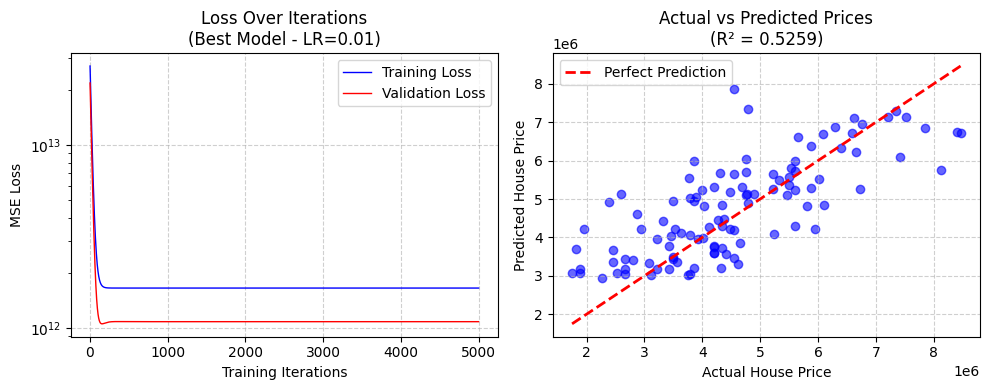


 DATASET INFORMATION
Original dataset size: 545
Training set size: 436
Validation set size: 109
Split ratio: 80.0% training, 20.0% validation


In [7]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Housing Dataset

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)


#  Prepare Features and Target

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
feature = data[features].values
target = data["price"].values.reshape(-1, 1)


# Split Data into Training and Validation Sets

torch.manual_seed(80)
N = feature.shape[0]
train_size = int(0.8 * N)

feature_tensor = torch.tensor(feature, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.float32)

indices = torch.randperm(N)
train_idx = indices[:train_size]
val_idx = indices[train_size:]

feature_train = feature_tensor[train_idx]
feature_val = feature_tensor[val_idx]
target_train = target_tensor[train_idx]
target_val = target_tensor[val_idx]


#  Normalize Feature Values
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train.numpy())
feature_val_scaled = scaler.transform(feature_val.numpy())
feature_train = torch.tensor(feature_train_scaled, dtype=torch.float32)
feature_val = torch.tensor(feature_val_scaled, dtype=torch.float32)


#  Explore Different Learning Rates

class LinearRegressionModel(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return self.linear(x)

learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000
results = {}
best_model = None
best_val_loss = float('inf')
best_lr = None

for lr in learning_rates:
    print(f"\n{'='*60}")
    print(f" TRAINING WITH LEARNING RATE: {lr}")
    print(f"{'='*60}")

    model = LinearRegressionModel(feature_train.shape[1])
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        target_pred = model(feature_train)
        loss = criterion(target_pred, target_train)
        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            target_val_pred = model(feature_val)
            val_loss = criterion(target_val_pred, target_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        # Print progress every 500 epochs
        if (epoch + 1) % 500 == 0 or epoch == 0:
            print(f"Epoch {epoch+1:4d}: Train Loss = {loss.item():10.2f}, Val Loss = {val_loss.item():10.2f}")

    # Final evaluation
    model.eval()
    with torch.no_grad():
        target_val_pred = model(feature_val)
        target_train_pred = model(feature_train)

        final_train_loss = criterion(target_train_pred, target_train)
        final_val_loss = criterion(target_val_pred, target_val)

        # Calculate RMSE
        train_rmse = torch.sqrt(final_train_loss)
        val_rmse = torch.sqrt(final_val_loss)

        # Calculate R-squared
        train_mean = target_train.mean()
        train_ss_total = ((target_train - train_mean) ** 2).sum()
        train_ss_residual = ((target_train - target_train_pred) ** 2).sum()
        train_r2 = 1 - (train_ss_residual / train_ss_total)

        val_mean = target_val.mean()
        val_ss_total = ((target_val - val_mean) ** 2).sum()
        val_ss_residual = ((target_val - target_val_pred) ** 2).sum()
        val_r2 = 1 - (val_ss_residual / val_ss_total)

    # Store results
    results[lr] = {
        'model': model,
        'final_train_loss': final_train_loss.item(),
        'final_val_loss': final_val_loss.item(),
        'train_rmse': train_rmse.item(),
        'val_rmse': val_rmse.item(),
        'train_r2': train_r2.item(),
        'val_r2': val_r2.item(),
        'train_losses': train_losses,
        'val_losses': val_losses
    }

    # Check if this is the best model
    if final_val_loss.item() < best_val_loss:
        best_val_loss = final_val_loss.item()
        best_model = model
        best_lr = lr
        best_train_losses = train_losses
        best_val_losses = val_losses

    print(f"\n FINAL RESULTS (LR={lr}):")
    print(f"MSE (Training): {final_train_loss.item():.2f}")
    print(f"MSE (Validation): {final_val_loss.item():.2f}")
    print(f"RMSE (Training): {train_rmse.item():.2f}")
    print(f"RMSE (Validation): {val_rmse.item():.2f}")
    print(f"R² Score (Training): {train_r2.item():.4f}")
    print(f"R² Score (Validation): {val_r2.item():.4f}")


#  Compare All Models and Select Best

print(f"\n{'='*70}")
print(f" MODEL COMPARISON RESULTS")
print(f"{'='*70}")
print(f"{'Learning Rate':<12} {'Train MSE':<12} {'Val MSE':<12} {'Val RMSE':<12} {'Val R²':<8}")
print(f"{'-'*70}")

for lr in learning_rates:
    result = results[lr]
    print(f"{lr:<12} {result['final_train_loss']:<12.2f} {result['final_val_loss']:<12.2f} {result['val_rmse']:<12.2f} {result['val_r2']:<8.4f}")

print(f"{'='*70}")
print(f" BEST MODEL: Learning Rate = {best_lr}")
print(f" Validation MSE: {best_val_loss:.2f}")
print(f" Validation RMSE: {results[best_lr]['val_rmse']:.2f}")
print(f" Validation R²: {results[best_lr]['val_r2']:.4f}")


# Display Best Model Parameters

best_weights = best_model.linear.weight.data.numpy().flatten()
best_bias = best_model.linear.bias.item()

print(f"\n{'='*50}")
print(f" BEST MODEL PARAMETERS (LR={best_lr})")
print(f"{'='*50}")
for f, w in zip(features, best_weights):
    print(f"{f}: {w:.4f}")
print(f"Bias (B): {best_bias:.4f}")


#  Plot Loss Over Iterations for Best Model

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), best_train_losses, label='Training Loss', color='blue', linewidth=1)
plt.plot(range(1, epochs + 1), best_val_losses, label='Validation Loss', color='red', linewidth=1)
plt.xlabel('Training Iterations')
plt.ylabel('MSE Loss')
plt.title(f'Loss Over Iterations\n(Best Model - LR={best_lr})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.yscale('log')


#  Plot Actual vs Predicted for Best Model

best_model.eval()
with torch.no_grad():
    best_val_pred = best_model(feature_val)

target_val_pred_np = best_val_pred.numpy()
target_val_np = target_val.numpy()

plt.subplot(1, 2, 2)
plt.scatter(target_val_np, target_val_pred_np, color='blue', alpha=0.6)
plt.plot([target_val_np.min(), target_val_np.max()],
         [target_val_np.min(), target_val_np.max()],
         'r--', label='Perfect Prediction', linewidth=2)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title(f'Actual vs Predicted Prices\n(R² = {results[best_lr]["val_r2"]:.4f})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Dataset info
print(f"\n{'='*40}")
print(f" DATASET INFORMATION")
print(f"{'='*40}")
print(f"Original dataset size: {N}")
print(f"Training set size: {len(feature_train)}")
print(f"Validation set size: {len(feature_val)}")
print(f"Split ratio: {len(feature_train)/N:.1%} training, {len(feature_val)/N:.1%} validation")

Problem 3 (a)

In [22]:
import torch
import torch.nn as nn
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler


# Load Housing Dataset

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Select features and target
features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
feature = data[features].values
target = data["price"].values.reshape(-1, 1)


# Split Dataset into Training and Validation Sets

torch.manual_seed(80)
N = feature.shape[0]
train_size = int(0.8 * N)

# Convert to PyTorch tensors
feature_tensor = torch.tensor(feature, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.float32)

# Create randomized indices for data splitting
indices = torch.randperm(N)
train_idx = indices[:train_size]
val_idx = indices[train_size:]

# Partition dataset into training and validation subsets
feature_train = feature_tensor[train_idx]
feature_val = feature_tensor[val_idx]
target_train = target_tensor[train_idx]
target_val = target_tensor[val_idx]


# Standardize Feature Values

scaler = StandardScaler()

# Normalize features using standardization
feature_train_scaled = scaler.fit_transform(feature_train.numpy())
feature_val_scaled = scaler.transform(feature_val.numpy())

# Convert normalized features back to tensors
feature_train = torch.tensor(feature_train_scaled, dtype=torch.float32)
feature_val = torch.tensor(feature_val_scaled, dtype=torch.float32)
# Target values remain in original scale


#  Define Neural Network Architecture

class NeuralNetwork(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.hidden = nn.Linear(n_features, 8)  # Hidden layer with 8 neurons
        self.relu = nn.ReLU()
        self.output = nn.Linear(8, 1)          # Output layer for regression

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Instantiate the neural network
model = NeuralNetwork(feature_train.shape[1])


#  Configure Training Components

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


#  Execute Model Training

epochs = 200
start_time = time.time()

for epoch in range(epochs):
    model.train()
    # Forward propagation
    target_pred = model(feature_train)
    loss = criterion(target_pred, target_train)

    # Backward propagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Model evaluation on validation set
    model.eval()
    with torch.no_grad():
        target_val_pred = model(feature_val)
        val_loss = criterion(target_val_pred, target_val)

training_time = time.time() - start_time


# Compute Performance Metrics

model.eval()
with torch.no_grad():
    # Generate predictions for both datasets
    target_train_pred = model(feature_train)
    target_val_pred = model(feature_val)

    # Calculate mean squared error
    train_mse = criterion(target_train_pred, target_train)
    val_mse = criterion(target_val_pred, target_val)

    # Calculate root mean squared error
    train_rmse = torch.sqrt(train_mse)
    val_rmse = torch.sqrt(val_mse)

    # Calculate R-squared for training
    train_mean = target_train.mean()
    train_ss_total = ((target_train - train_mean) ** 2).sum()
    train_ss_residual = ((target_train - target_train_pred) ** 2).sum()
    train_r2 = 1 - (train_ss_residual / train_ss_total)

    # Calculate R-squared for validation
    val_mean = target_val.mean()
    val_ss_total = ((target_val - val_mean) ** 2).sum()
    val_ss_residual = ((target_val - target_val_pred) ** 2).sum()
    val_r2 = 1 - (val_ss_residual / val_ss_total)


#  Calculate Model Size

def get_model_size(model):
    """Calculate model size in bytes and parameters count"""
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()

    total_size_bytes = param_size + buffer_size
    total_params = sum(p.numel() for p in model.parameters())

    return total_size_bytes, total_params

model_size_bytes, total_params = get_model_size(model)
model_size_kb = model_size_bytes / 1024
model_size_mb = model_size_kb / 1024


# Display Training Results

print("\n Neural Network Training Summary ")
print(f"Total Training Time: {training_time:.2f} seconds")
print(f"\n Model Performance Metrics ")
print(f"MSE-Training: {train_mse.item():.2f}")
print(f"MSE-Validation: {val_mse.item():.2f}")
print(f"\nRMSE-Training: {train_rmse.item():.2f}")
print(f"RMSE-Validation: {val_rmse.item():.2f}")
print(f"\nR²-Training: {train_r2.item():.4f}")
print(f"R²-Validation: {val_r2.item():.4f}")

# Dataset information
print(f"\n Dataset Information")
print(f"Original dataset size: {N}")
print(f"Training set size: {len(feature_train)}")
print(f"Validation set size: {len(feature_val)}")
print(f"Split ratio: {len(feature_train)/N:.1%} training, {len(feature_val)/N:.1%} validation")

# Additional model details
print(f"\n Model Size ")
print(f"Model Parameters: {total_params:,}")
print("Layer breakdown:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"  {name}: {param.shape} -> {param.nelement():,} parameters")


 Neural Network Training Summary 
Total Training Time: 0.33 seconds

 Model Performance Metrics 
MSE-Training: 27063442472960.00
MSE-Validation: 22815390564352.00

RMSE-Training: 5202253.50
RMSE-Validation: 4776546.00

R²-Training: -6.1645
R²-Validation: -8.9992

 Dataset Information
Original dataset size: 545
Training set size: 436
Validation set size: 109
Split ratio: 80.0% training, 20.0% validation

 Model Size 
Model Parameters: 57
Layer breakdown:
  hidden.weight: torch.Size([8, 5]) -> 40 parameters
  hidden.bias: torch.Size([8]) -> 8 parameters
  output.weight: torch.Size([1, 8]) -> 8 parameters
  output.bias: torch.Size([1]) -> 1 parameters


Problem 3(b)

In [23]:
import torch
import torch.nn as nn
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler


# Load Housing Dataset

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Select features and target
features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
feature = data[features].values
target = data["price"].values.reshape(-1, 1)


# Split Dataset into Training and Validation Sets

torch.manual_seed(80)
N = feature.shape[0]
train_size = int(0.8 * N)

# Convert to PyTorch tensors
feature_tensor = torch.tensor(feature, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.float32)

# Create randomized indices for data splitting
indices = torch.randperm(N)
train_idx = indices[:train_size]
val_idx = indices[train_size:]

# Partition dataset into training and validation subsets
feature_train = feature_tensor[train_idx]
feature_val = feature_tensor[val_idx]
target_train = target_tensor[train_idx]
target_val = target_tensor[val_idx]


# Standardize Feature Values

scaler = StandardScaler()

# Normalize features using standardization
feature_train_scaled = scaler.fit_transform(feature_train.numpy())
feature_val_scaled = scaler.transform(feature_val.numpy())

# Convert normalized features back to tensors
feature_train = torch.tensor(feature_train_scaled, dtype=torch.float32)
feature_val = torch.tensor(feature_val_scaled, dtype=torch.float32)
# Target values remain in original scale


# Define Neural Network Architecture with Three Hidden Layers

class NeuralNetwork(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        # Three hidden layers with decreasing neurons: 16 -> 8 -> 4
        self.hidden1 = nn.Linear(n_features, 16)  # First hidden layer with 16 neurons
        self.hidden2 = nn.Linear(16, 8)           # Second hidden layer with 8 neurons
        self.hidden3 = nn.Linear(8, 4)            # Third hidden layer with 4 neurons
        self.relu = nn.ReLU()
        self.output = nn.Linear(4, 1)             # Output layer for regression

    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Instantiate the neural network
model = NeuralNetwork(feature_train.shape[1])


# Configure Training Components

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


#  Execute Model Training with Loss Tracking

epochs = 200
start_time = time.time()

# Lists to track losses for overfitting analysis
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    # Forward propagation
    target_pred = model(feature_train)
    loss = criterion(target_pred, target_train)

    # Backward propagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Model evaluation on validation set
    model.eval()
    with torch.no_grad():
        target_val_pred = model(feature_val)
        val_loss = criterion(target_val_pred, target_val)

    # Store losses for analysis
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

training_time = time.time() - start_time


# Compute Performance Metrics

model.eval()
with torch.no_grad():
    # Generate predictions for both datasets
    target_train_pred = model(feature_train)
    target_val_pred = model(feature_val)

    # Calculate mean squared error
    train_mse = criterion(target_train_pred, target_train)
    val_mse = criterion(target_val_pred, target_val)

    # Calculate root mean squared error
    train_rmse = torch.sqrt(train_mse)
    val_rmse = torch.sqrt(val_mse)

    # Calculate R-squared for training
    train_mean = target_train.mean()
    train_ss_total = ((target_train - train_mean) ** 2).sum()
    train_ss_residual = ((target_train - target_train_pred) ** 2).sum()
    train_r2 = 1 - (train_ss_residual / train_ss_total)

    # Calculate R-squared for validation
    val_mean = target_val.mean()
    val_ss_total = ((target_val - val_mean) ** 2).sum()
    val_ss_residual = ((target_val - target_val_pred) ** 2).sum()
    val_r2 = 1 - (val_ss_residual / val_ss_total)


# Calculate Model Size

def get_model_size(model):
    """Calculate model size in bytes and parameters count"""
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()

    total_size_bytes = param_size + buffer_size
    total_params = sum(p.numel() for p in model.parameters())

    return total_size_bytes, total_params

model_size_bytes, total_params = get_model_size(model)



#  Overfitting Analysis
# Calculate performance gaps
mse_gap = val_mse.item() - train_mse.item()
rmse_gap = val_rmse.item() - train_rmse.item()
r2_gap = train_r2.item() - val_r2.item()


# Display Training Results

print("\n Neural Network Training Summary ")
print(f"Total Training Time: {training_time:.2f} seconds")

print(f"\n Model Performance Metrics ")
print(f"MSE-Training: {train_mse.item():.2f}")
print(f"MSE-Validation: {val_mse.item():.2f}")
print(f"\nRMSE-Training: {train_rmse.item():.2f}")
print(f"RMSE-Validation: {val_rmse.item():.2f}")
print(f"\nR²-Training: {train_r2.item():.4f}")
print(f"R²-Validation: {val_r2.item():.4f}")

# Dataset information
print(f"\n Dataset Information ")
print(f"Original dataset size: {N}")
print(f"Training set size: {len(feature_train)}")
print(f"Validation set size: {len(feature_val)}")
print(f"Split ratio: {len(feature_train)/N:.1%} training, {len(feature_val)/N:.1%} validation")

# Additional model details
print(f"\n Model Size ")
print(f"Model Parameters: {total_params:,}")
print("Layer breakdown:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"  {name}: {param.shape} -> {param.nelement():,} parameters")

print(f"\n Overfitting Check ")
print(f"Performance Gaps:")
print(f"  MSE Gap (Val - Train): {mse_gap:+.2f}")
print(f"  RMSE Gap (Val - Train): {rmse_gap:+.2f}")
print(f"  R² Gap (Train - Val): {r2_gap:+.4f}")


 Neural Network Training Summary 
Total Training Time: 0.30 seconds

 Model Performance Metrics 
MSE-Training: 27063442472960.00
MSE-Validation: 22815390564352.00

RMSE-Training: 5202253.50
RMSE-Validation: 4776546.00

R²-Training: -6.1645
R²-Validation: -8.9992

 Dataset Information 
Original dataset size: 545
Training set size: 436
Validation set size: 109
Split ratio: 80.0% training, 20.0% validation

 Model Size 
Model Parameters: 273
Layer breakdown:
  hidden1.weight: torch.Size([16, 5]) -> 80 parameters
  hidden1.bias: torch.Size([16]) -> 16 parameters
  hidden2.weight: torch.Size([8, 16]) -> 128 parameters
  hidden2.bias: torch.Size([8]) -> 8 parameters
  hidden3.weight: torch.Size([4, 8]) -> 32 parameters
  hidden3.bias: torch.Size([4]) -> 4 parameters
  output.weight: torch.Size([1, 4]) -> 4 parameters
  output.bias: torch.Size([1]) -> 1 parameters

 Overfitting Check 
Performance Gaps:
  MSE Gap (Val - Train): -4248051908608.00
  RMSE Gap (Val - Train): -425707.50
  R² Gap (